# A Predictor of Red and White Wine

This part 3/3 of the Journal of Wine series uses both the red wine and the white wine datasets to construct a classifier to predict red wine vs. white wine. 

# Load Modules

In [1]:
# Graphs and array operations
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt 

%matplotlib inline
# IPython Notebook function, just ignore

from sklearn.model_selection import train_test_split # split data
from sklearn.preprocessing import StandardScaler # for scaling
from sklearn.pipeline import make_pipeline # for grouping scaler and model into a wrapper called pipeline, goes into GridSearch
from sklearn.model_selection import GridSearchCV # for cross-validation, determines best hyperparameters

# Performance measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Saving model
from sklearn.externals import joblib 

# Models to be used:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load Datasets

In [2]:
dataset_url_red = '../Red Wine/wine-quality-red.csv'
data_red = pd.read_csv(dataset_url_red, sep = ";")
dataset_url_white = '../White Wine/wine-quality-white.csv'
data_white = pd.read_csv(dataset_url_white, sep = ";")

data_red_len = data_red.shape[0]
data_white_len = data_white.shape[0]
print("size of red wine dataset: %d" % data_red_len)
print("size of white wine dataset: %d\n" % data_white_len)

print("Red Wine: ")
display(data_red.head())
print("White Wine: ")
display(data_white.head())

size of red wine dataset: 1599
size of white wine dataset: 4898

Red Wine: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


White Wine: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


As you can see, the size of the white wine dataset is significantly larger than the red wine dataset. This will naturally cause our classifier to biasly predict white wine more. Hence, we introduce an technique called undersampling

# Undersample

In [3]:
data_white_us_index = np.random.choice(data_white.index, data_red_len, replace=False)
data_white_us = data_white.loc[data_white_us_index]

print("Red wine size again: %d" % data_red_len)
print("White wine undersampled size: %d" % data_white_us.shape[0])

Red wine size again: 1599
White wine undersampled size: 1599


Now, after resampling, we add labels of 'Red' and 'White' to the datasets. 

In [4]:
data_red['label'] = pd.Series('Red', data_red.index)
print("Final red wine dataset: ")
display(data_red.head())

print("Final white wine dataset: ")
data_white_us['label'] = pd.Series('White', data_white_us.index)
display(data_white_us.head())

Final red wine dataset: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


Final white wine dataset: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
1903,7.8,0.34,0.27,1.2,0.040,25.0,106.0,0.9932,3.01,0.55,10.4,5,White
237,6.8,0.52,0.32,13.2,0.044,54.0,221.0,0.9972,3.27,0.50,9.6,6,White
4808,7.3,0.35,0.67,8.3,0.053,10.0,100.0,0.9959,3.19,0.50,10.9,5,White
3465,6.8,0.19,0.34,1.9,0.040,41.0,108.0,0.9900,3.25,0.45,12.9,6,White
409,8.2,0.28,0.42,1.8,0.031,30.0,93.0,0.9917,3.09,0.39,11.4,5,White


Now, we merge these datasets to create the dataframe used for machine learning models.

In [5]:
df = pd.concat([data_red, data_white_us], axis=0)
print("Final data head: ")
display(df[0:5])
print("\nFinal data tail: ")
display(df[-5:])

Final data head: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red



Final data tail: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
4696,6.1,0.15,0.40,1.2,0.030,19.0,84.0,0.98926,3.19,0.96,13.0,6,White
3281,6.5,0.32,0.30,2.3,0.051,20.0,127.0,0.98964,3.13,0.52,12.8,6,White
1788,8.2,0.36,0.29,7.6,0.035,37.0,122.0,0.99390,3.16,0.34,12.0,5,White
2658,6.5,0.15,0.44,12.6,0.052,65.0,158.0,0.99688,3.26,0.70,10.3,7,White
1266,7.5,0.28,0.34,4.2,0.028,36.0,116.0,0.99100,2.99,0.41,12.3,8,White


Note that all the red wines are in the beginning and all the white wines are at the end. This will be a threat when we partition the data for cross validation (depending on how you implement it, but we will fix it now). Hence, we will shuffle the dataset right now.

Explanation:

    df.sample 
        samples a fraction of the df in random order, using frac=1 tells sample to pick out everything
    reset_index 
        self-explanatory, it resets the index, since df.sample preserves the previous index

In [6]:
df = df.sample(frac=1).reset_index(drop=True)
print("After shuffling: ")
df.head()

After shuffling: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.2,0.16,0.29,1.0,0.031,40.0,123.0,0.98958,3.12,0.40,12.1,7,White
1,8.6,0.49,0.51,2.0,0.422,16.0,62.0,0.99790,3.03,1.17,9.0,5,Red
2,8.0,0.57,0.23,3.2,0.073,17.0,119.0,0.99675,3.26,0.57,9.3,5,Red
3,7.6,0.31,0.34,2.5,0.082,26.0,35.0,0.99356,3.22,0.59,12.5,7,Red
4,6.0,0.34,0.66,15.9,0.046,26.0,164.0,0.99790,3.14,0.50,8.8,6,White


# Train-Test Split
Using our old friend:

In [7]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=111, stratify=df['label'])

y_train = df_train['label'].reset_index(drop=True)
X_train = df_train.drop(['label'], axis=1).reset_index(drop=True)
y_test = df_test['label'].reset_index(drop=True)
X_test = df_test.drop(['label'], axis=1).reset_index(drop=True)

print("Training set size: ", X_train.shape[0])
print("Test set size: ", X_test.shape[0])
print("Test set proportion: %.2f" % (X_test.shape[0]/(X_test.shape[0] + X_train.shape[0])))

Training set size:  2558
Test set size:  640
Test set proportion: 0.20


# Data Visualization
To better visualize the data on graphs, we will first standardize the dataset

In [8]:
scaler = StandardScaler().fit(X_train)

X_train_s = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_train_s.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,2558.00,2558.00,2558.00,2558.00,2558.00,2558.00,2558.00,2558.00,2558.00,2558.00,2558.00,2558.00
mean,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.43,-1.57,-1.83,-0.90,-1.17,-1.44,-1.46,-2.75,-3.10,-1.82,-2.15,-3.22
25%,-0.64,-0.80,-0.54,-0.63,-0.57,-0.79,-0.93,-0.74,-0.67,-0.63,-0.86,-0.89
50%,-0.25,-0.23,0.00,-0.48,-0.18,-0.14,-0.04,0.16,-0.00,-0.15,-0.18,0.28
75%,0.39,0.70,0.61,0.31,0.30,0.57,0.72,0.72,0.66,0.45,0.68,0.28
max,5.34,6.08,4.28,6.69,12.56,6.09,4.71,5.23,4.61,8.53,3.77,3.78


Grouping X_train scaled back with its label:

In [9]:
df_train_s = pd.concat([X_train_s, y_train], axis=1)
df_train_s.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,-0.506753,0.959264,-1.460008,0.403825,-0.157470,-0.850539,-1.252238,0.310382,0.967543,0.090832,0.252832,1.448526,Red
1,-0.057226,0.442523,-0.666677,-0.602875,0.211677,-0.909898,-0.807209,0.136098,0.846111,-0.208431,-0.692094,-0.887747,Red
2,-0.506753,-0.745982,0.614860,0.772131,-0.480473,1.167661,1.503518,0.181412,-0.307498,-0.507695,-1.035704,-0.887747,White
3,0.328082,-0.332589,-0.117447,0.772131,-0.618903,2.651632,2.376459,0.094270,-0.671795,-0.148579,-0.606192,0.280389,White
4,-0.442535,0.390849,-0.605651,-0.602875,0.350106,-0.969257,-1.166655,0.188383,0.846111,-0.866810,-1.250460,-2.055884,Red


Again, melt the dataframe into:

In [10]:
df_train_melt = pd.melt(df_train_s, id_vars=['label'], var_name='Stats')
df_train_melt.head()

,label,Stats,value
0,Red,fixed acidity,-0.506753
1,Red,fixed acidity,-0.057226
2,White,fixed acidity,-0.506753
3,White,fixed acidity,0.328082
4,Red,fixed acidity,-0.442535


Now, the actual visualization:
### Violin Plot:

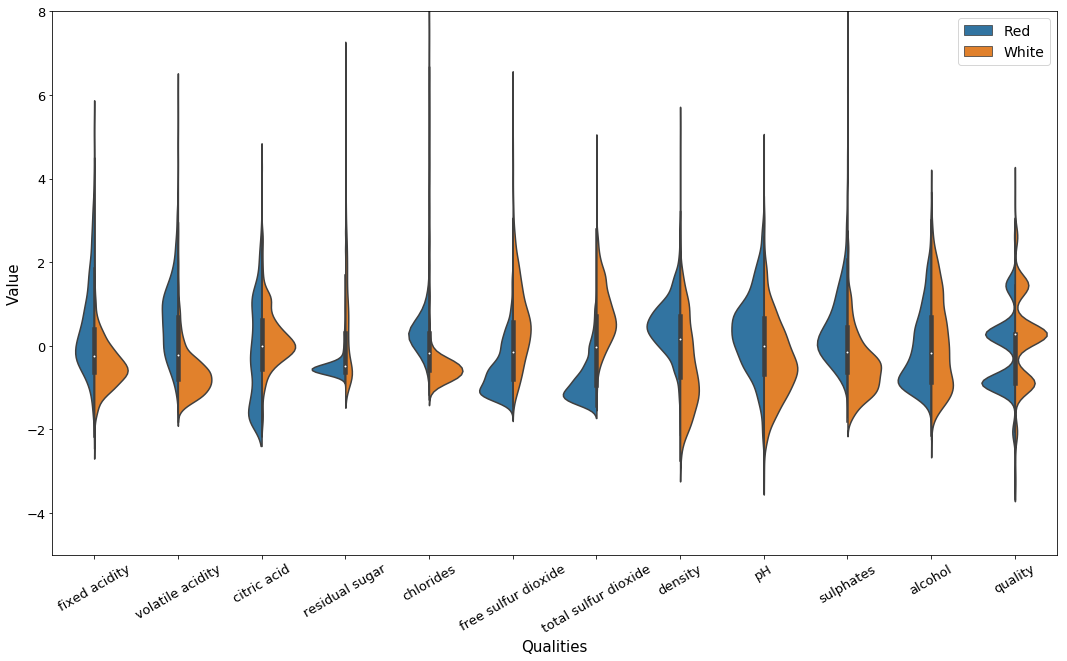

In [11]:
plt.subplots(figsize=(18,10))
ax_violin = sns.violinplot(x='Stats', y='value', data=df_train_melt, hue='label', split=True)
plt.xticks(rotation=30, fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel("Qualities", fontsize=15);
plt.ylabel("Value", fontsize=15);
plt.legend(prop={'size': 14});
plt.ylim(-5, 8);

### Swarm Plot:

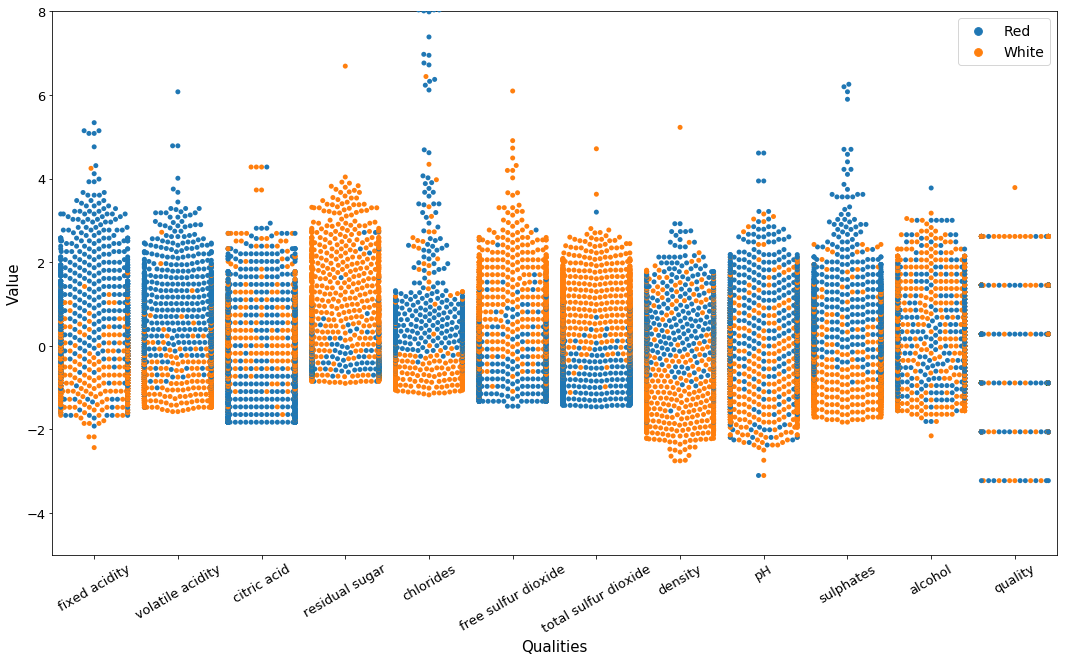

In [12]:
plt.subplots(figsize=(18,10))
ax_swarm = sns.swarmplot(x='Stats', y='value', data=df_train_melt, hue='label')
plt.xticks(rotation=30, fontsize=13);
plt.yticks(fontsize=13);
plt.xlabel("Qualities", fontsize=15);
plt.ylabel("Value", fontsize=15);
plt.legend(prop={'size': 14});
plt.ylim(-5, 8);

These qualities all have distinct separation (maybe except quality), which will really help later in the classification step.

# Model Selection
Again, we'll try a few different models and see how they perform

### Logistic Regression

In [13]:
pipeline_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

hyperparameters_lr = {
    'logisticregression__C' : [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]
}

CV_lr = GridSearchCV(pipeline_lr, hyperparameters_lr, cv=3)

CV_lr.fit(X_train, y_train)

print("Best Parameters: ", CV_lr.best_params_)

Best Parameters:  {'logisticregression__C': 1}


**Final Model**

In [14]:
CV_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(C = 1)
)
CV_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

**Performance**

Confusion Matrix: 


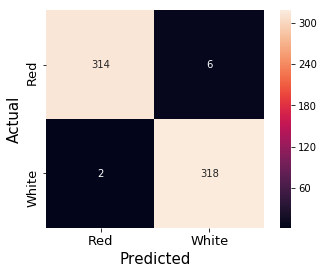

Classification Scores: 
             precision    recall  f1-score   support

        Red       0.99      0.98      0.99       320
      White       0.98      0.99      0.99       320

avg / total       0.99      0.99      0.99       640



In [15]:
y_pred_lr = CV_lr.predict(X_test)

def scores(y_test, y_pred):
    print("Confusion Matrix: ")

    cm = pd.crosstab(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', square=True);
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Predicted", fontsize=15)
    plt.ylabel("Actual", fontsize=15)
    plt.show()
    
    print("Classification Scores: ")
    print(classification_report(y_test, y_pred))
    return

scores(y_test, y_pred_lr)

That is really impressive performance, close to 100 percent!

### Support Vector Machine

In [ ]:
pipeline_svc = make_pipeline(
    StandardScaler(),
    SVC()
)

hyperparameters_svc = {
    'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'svc__C' : [0.01, 0.03, 0.1, 0.3, 1]
}

CV_svc = GridSearchCV(pipeline_svc, hyperparameters_svc, cv=3)

CV_svc.fit(X_train, y_train)

print("Best Parameters: ", CV_svc.best_params_)

**Final Model**


In [17]:
CV_svc = make_pipeline(
    StandardScaler(),
    SVC(C = 1, kernel = 'rbf')
)

CV_svc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

**Performance**

Confusion Matrix: 


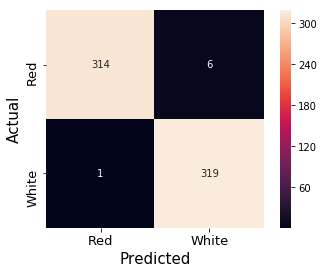

Classification Scores: 
             precision    recall  f1-score   support

        Red       1.00      0.98      0.99       320
      White       0.98      1.00      0.99       320

avg / total       0.99      0.99      0.99       640



In [18]:
y_pred_svc = CV_svc.predict(X_test)
scores(y_test, y_pred_svc)

# Conclusion
Similarly, we have close to 100% performance! We can safely say that use any model above would be sufficient for a Red vs. White wine Classifier. 

That concludes the final, part 3/3 of this notebook. Thanks for reading!

In [19]:
joblib.dump(CV_lr, 'lr_classifier.pkl')
# To load: CV_lr2 = joblib.load('lr_classifier.pkl')

['lr_classifier.pkl']